# Run the whole deltas algorithm

In [36]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
# import deltas
import model_deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [37]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-20, -20],
    m2=[20, 20],
    cov1=[[10, 0], [0, 10]],
    cov2=[[50, 0], [0, 20]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

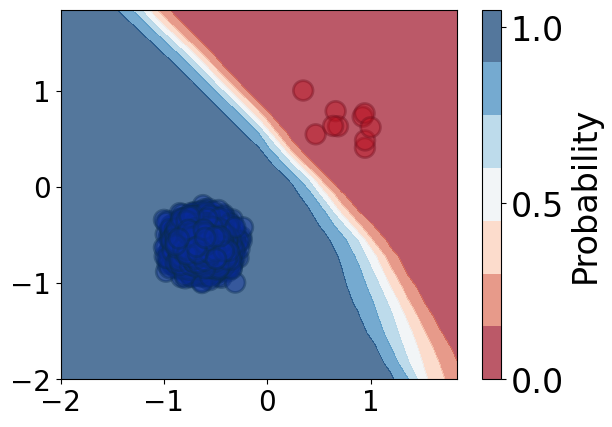

In [38]:
model = 'SVM'
# model = 'Linear'
model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'] = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [39]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[4.60129269]])

## Fit deltas

deltas init: [1, 0.7338902461942439]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.005005005005006 
    delta2: 0.7915796454767217
    constraint satisfied: False


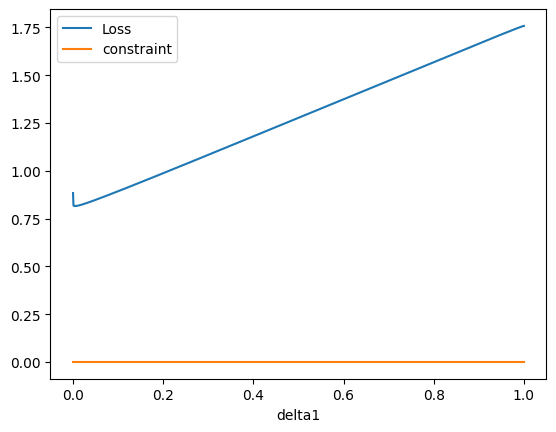

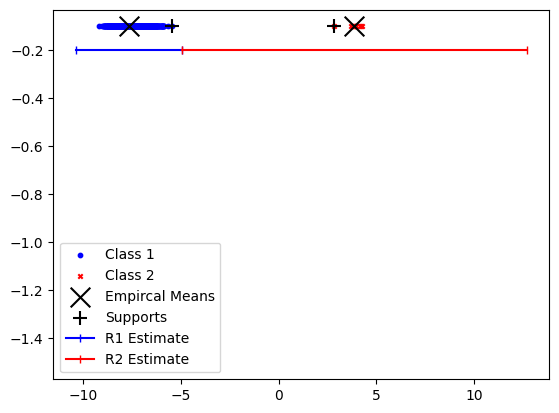

In [40]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.base_deltas(clf).fit(X, y, _print=True, _plot=True)

## Plot training data information

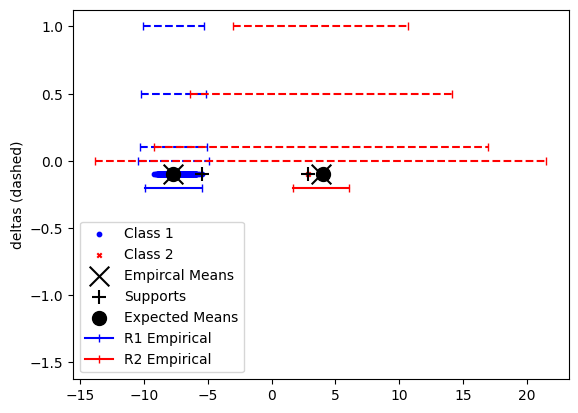

In [41]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## Show parameters

In [42]:
deltas_model.print_params()

Parameters
                R:  9.188359797977588
                N1: 10000
                N2: 10
                R1: 2.2223311881007746
                R2: 1.043970259111794
                M:  8.280648615816336
                D:  11.546950063028905
                C1: 1
                C2: 1


# Evaluation on test data

a
b
original accuracy: 0.9996
deltas   accuracy: 1.0
original F1: 0.9995998399359743
deltas   F1: 1.0
original precision: 1.0
deltas   precision: 1.0


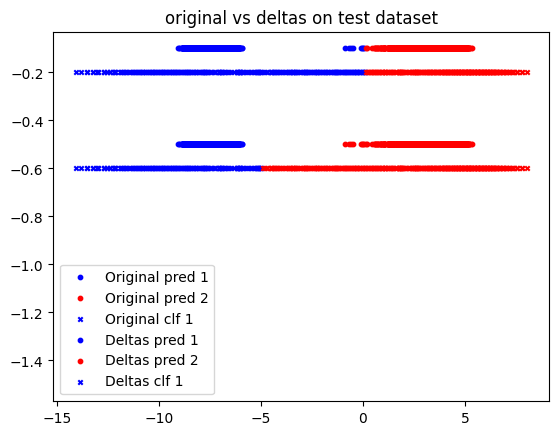

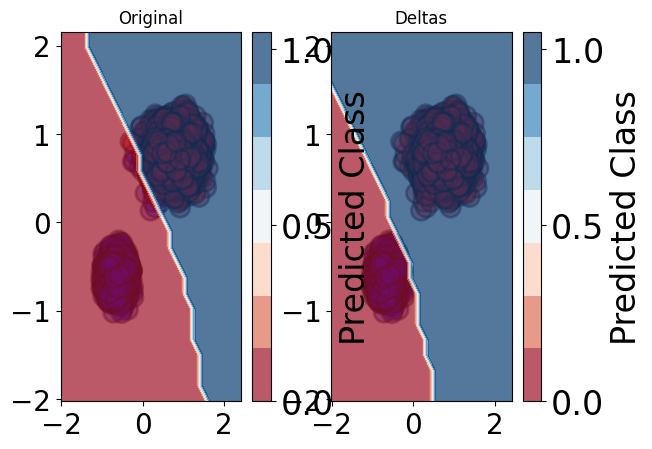

In [43]:
pipeline.eval_test_new(clf, deltas_model,
                       data_clf['data_test'], _print=True, _plot=True)